In [1]:
# library imports
import pandas as pd 
import numpy as np 
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
names = [
    "Nearest Neighbors",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "LDA",
    "Logistic Regression",
    "XGBoost",
    "SGD",
    "Gradient Boosting Classifier"
]

classifiers = [
    KNeighborsClassifier(),
    SVC(), # kernel = "rbf" by default
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    LinearDiscriminantAnalysis(),
    LogisticRegression(),
    XGBClassifier(),
    SGDClassifier(),
    GradientBoostingClassifier()
]

# Iterate over classifiers

In [4]:
# supress warnings - as we use deault values, some classifiers give warnings. Mainly logistic regression and Linear Discriminant analysis.
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

We use compliance_2020 for algorithm evaluation because test data does not have prediction value for compliance_2021.

In [6]:
train_df = pd.read_csv("../clean_data/train_mean_impute.csv")
test_df = pd.read_csv("../clean_data/test_mean_impute.csv")

In [25]:
X_test = test_df.drop(['compliance_2020'], axis=1) #test_df.iloc[:,:27] 
y_test = test_df['compliance_2020'] 

X_train = train_df.drop(['compliance_2020', 'compliance_2021'], axis=1) #train_df.iloc[:,:27]
y_train = train_df['compliance_2020'] 

Beacuse some of the classifiers have very varying results depending on the random state, we run them trough 100 iterations to get their average accuracy score. We use accuracy score to compare algorihtms.

In [26]:
iterations = 100
results = {}
time_result = {}


for i in range(iterations):
    for classifier_name, classifer in zip(names, classifiers):
            start_time = time.time()
            classifer.fit(X_train, y_train)
            score = classifer.score(X_test, y_test)
            end_time = time.time()
            totalTime = end_time - start_time
            if classifier_name in results:
                results[classifier_name].append(score)
                time_result[classifier_name].append(totalTime)
            else:
                results[classifier_name] = [score]
                time_result[classifier_name] = [totalTime]


[03:32:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:32:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:32:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:32:39] WARNING: /tmp/abs_40obctay9q/croots/recip

[03:33:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:33:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:33:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:33:30] WARNING: /tmp/abs_40obctay9q/croots/recip

[03:34:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:34:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:34:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:34:08] WARNING: /tmp/abs_40obctay9q/croots/recip

[03:34:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:34:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:34:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:34:46] WARNING: /tmp/abs_40obctay9q/croots/recip

In [27]:
start_time = time.time()
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
end_time = time.time()
totalTime = end_time - start_time
print(totalTime)

0.2454853057861328


# Plot classifier accuracy

First we plot all classifier scores over 100 iterations, to see how they vary.

Text(0.5, 1.0, 'Classifier accuracy: 100 iterations')

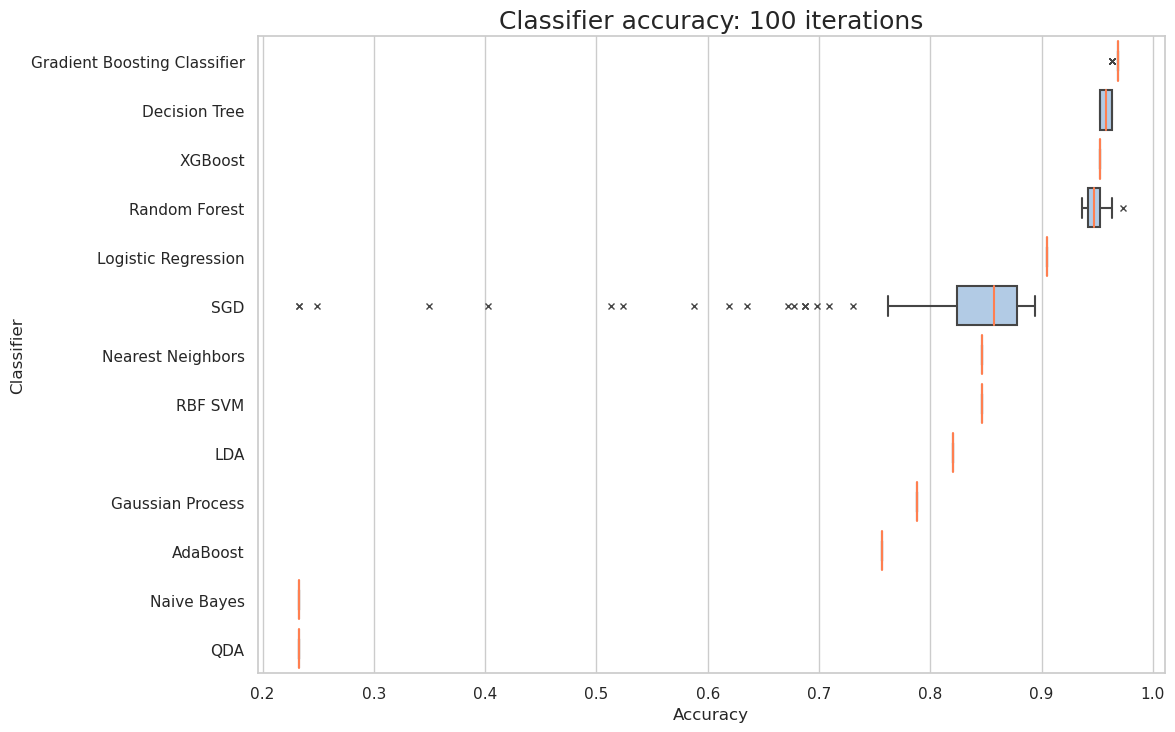

In [28]:
rows = []
for name in names:
    for row in results[name]:
        rows.append([name, row])
d = pd.DataFrame(rows, columns=['Classifier', 'Accuracy'])

grouped = d.loc[:,['Classifier', 'Accuracy']] \
    .groupby(['Classifier']) \
    .median() \
    .sort_values(by='Accuracy', ascending = False)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid") 

sns.boxplot(data=d, x="Accuracy", y="Classifier", order = grouped.index,
           flierprops={"marker": "x"},
           boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"}
           ).set_title('Classifier accuracy: 100 iterations', fontsize=18)

array([[<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>]], dtype=object)

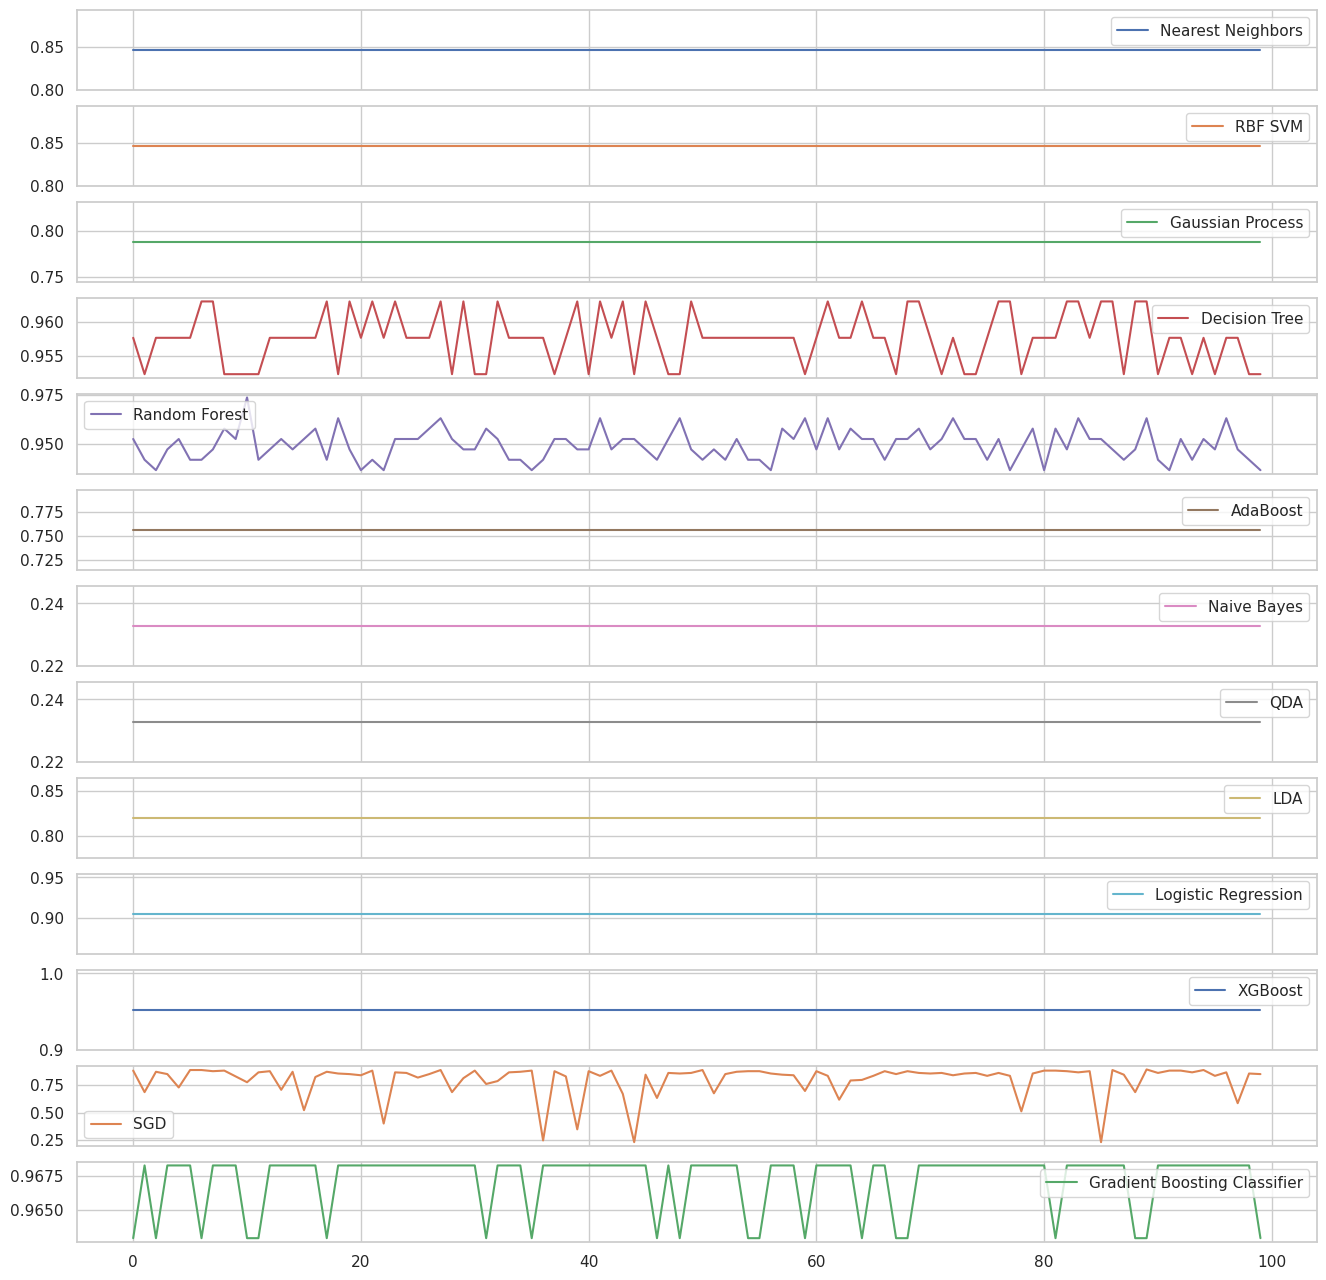

In [29]:
my_df = pd.DataFrame(data=results, columns=names)
my_df.plot(subplots=True, layout=(13,1), figsize=(16,16))

To compare classifier scores, we plot them to a single plot.

<AxesSubplot:>

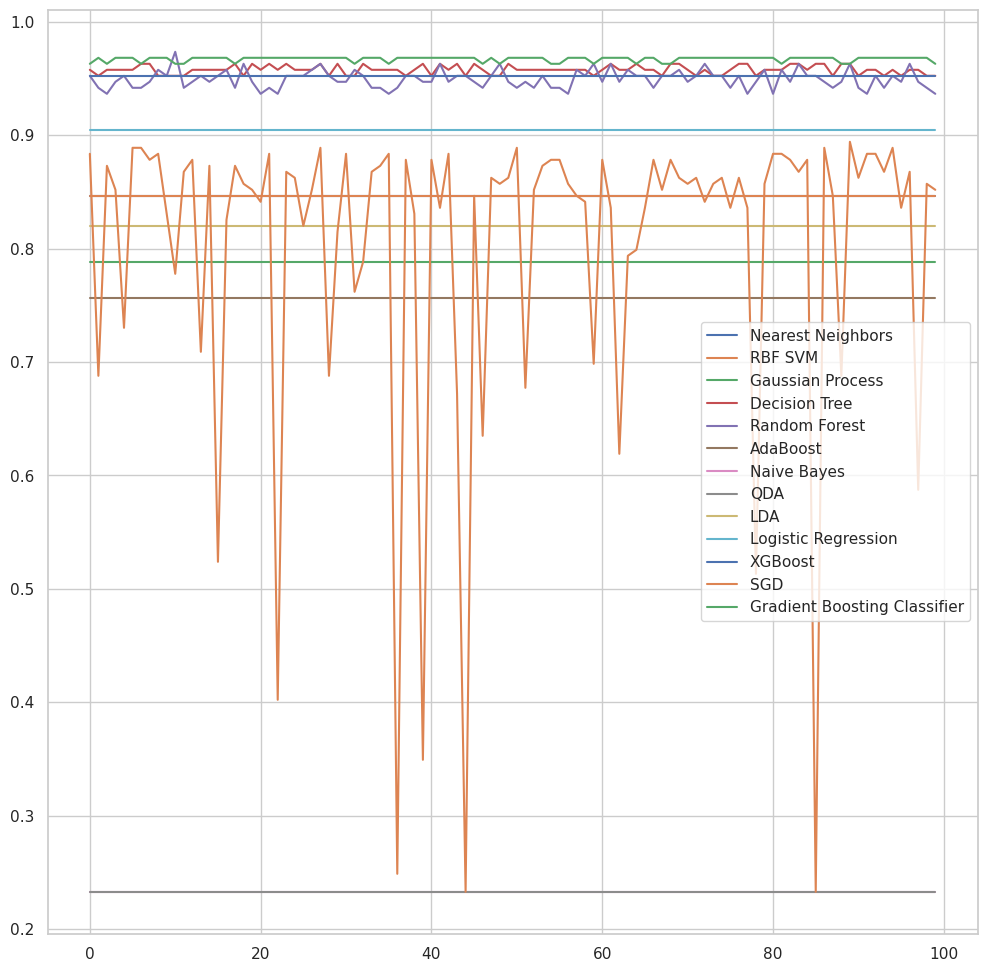

In [30]:
my_df.plot(figsize=(12,12))

# Plot classifer runtime

Text(0.5, 1.0, 'Classifier runtime: 100 iterations')

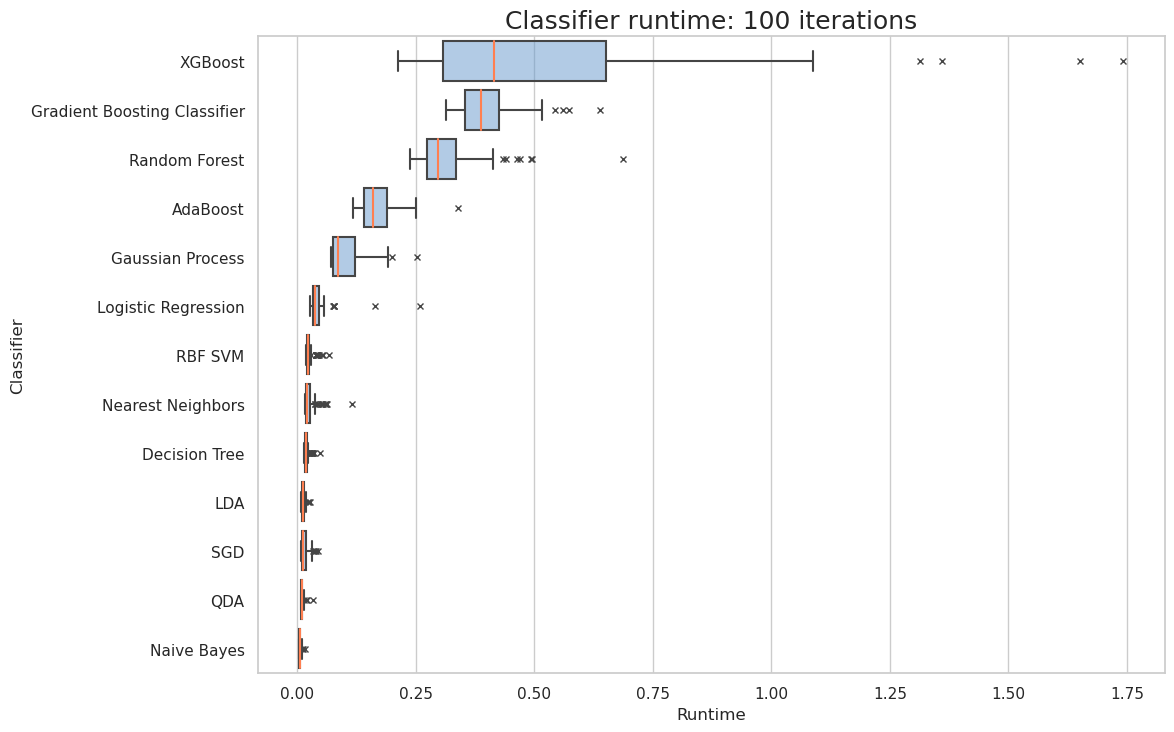

In [31]:
time_df = pd.DataFrame(data=time_result, columns=names)
time_df = time_df.melt(ignore_index=False)
time_df = time_df.rename(columns={'variable': 'Classifier', 'value': 'Runtime'}) 

grouped = time_df.loc[:,['Classifier', 'Runtime']] \
    .groupby(['Classifier']) \
    .median() \
    .sort_values(by='Runtime', ascending = False)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid") 

sns.boxplot(data=time_df, x="Runtime", y="Classifier", order = grouped.index,
           flierprops={"marker": "x"},
           boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"}
           ).set_title('Classifier runtime: 100 iterations', fontsize=18)

<AxesSubplot:>

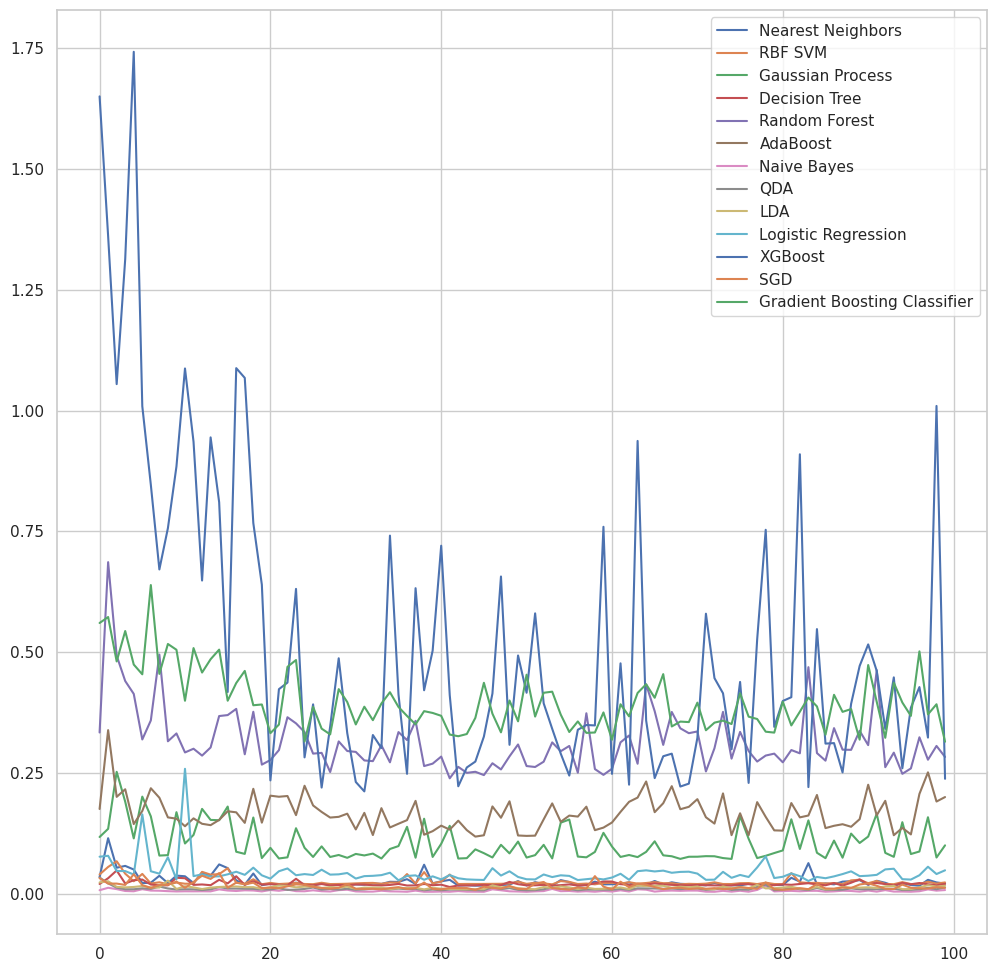

In [32]:
time_df = pd.DataFrame(data=time_result, columns=names)
time_df.plot(figsize=(12,12))

# How long one run took on average

In [33]:
time_mean_results = []
for key in names:
    mean = np.array(time_result[key]).mean()
    time_mean_results.append(mean)
    
timeMeanDf = pd.DataFrame(data=[time_mean_results], columns=names).T.sort_values(by=0, ascending=False)
timeMeanDf

,0
XGBoost,0.521391
Gradient Boosting Classifier,0.397481
Random Forest,0.314885
AdaBoost,0.166165
Gaussian Process,0.103941
Logistic Regression,0.043320
Nearest Neighbors,0.025374
RBF SVM,0.024646
Decision Tree,0.020025
SGD,0.014986


... median

In [34]:
time_median_results = []
for key in names:
    median = np.median(time_result[key])
    time_median_results.append(median)
    
timemedianDf = pd.DataFrame(data=[time_median_results], columns=names).T.sort_values(by=0, ascending=False)
timemedianDf

,0
XGBoost,0.414402
Gradient Boosting Classifier,0.386448
Random Forest,0.297058
AdaBoost,0.159135
Gaussian Process,0.086491
Logistic Regression,0.038275
RBF SVM,0.021542
Nearest Neighbors,0.020832
Decision Tree,0.018430
LDA,0.012623


# How long 100 iterations took per classifier

In [35]:
time_sum_results = []
for key in names:
    summed = np.array(time_result[key]).sum()
    time_sum_results.append(summed)
    
timeSumDf = pd.DataFrame(data=[time_sum_results], columns=names).T.sort_values(by=0, ascending=False)
timeSumDf

,0
XGBoost,52.139052
Gradient Boosting Classifier,39.748070
Random Forest,31.488507
AdaBoost,16.616493
Gaussian Process,10.394097
Logistic Regression,4.332031
Nearest Neighbors,2.537355
RBF SVM,2.464636
Decision Tree,2.002528
SGD,1.498571


# Average accuracy of each classifier based on 100 runs

In [36]:
mean_results = []
for key in names:
    mean = np.array(results[key]).mean()
    mean_results.append(mean)
    
meanDf = pd.DataFrame(data=[mean_results], columns=names).T.sort_values(by=0, ascending=False)
meanDf

,0
Gradient Boosting Classifier,0.967196
Decision Tree,0.957672
XGBoost,0.952381
Random Forest,0.949418
Logistic Regression,0.904762
Nearest Neighbors,0.846561
RBF SVM,0.846561
LDA,0.820106
SGD,0.803228
Gaussian Process,0.788360


# Median accuracy of each classifier based on 100 runs

In [37]:
median_results = []
for key in names:
    median = np.median(results[key])
    median_results.append(median)
    
medianDf = pd.DataFrame(data=[median_results], columns=names).T.sort_values(by=0, ascending=False)
medianDf

,0
Gradient Boosting Classifier,0.968254
Decision Tree,0.957672
XGBoost,0.952381
Random Forest,0.947090
Logistic Regression,0.904762
SGD,0.857143
Nearest Neighbors,0.846561
RBF SVM,0.846561
LDA,0.820106
Gaussian Process,0.788360


## Results

When looking only accuracies, it seems that the best performing classifier is [Gradient Boosting Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html). **But what about runtime?**  
Next, we are going to rank classifers based on how they ranked in accuracy and runtime leaderboards. The higher the accuracy, the higher the rank. The lower the runtime, the higher the rank.

In [38]:
runtime_df = timeMeanDf.copy()
runtime_df['runtime_rank'] = list(reversed(range(1, len(runtime_df) + 1))) # here higher runtime is worse, so we reverse
runtime_df.rename( columns={0 :'runtime'}, inplace=True )
runtime_df.index.name = 'Classifier'

accuracy_df = meanDf.copy()
accuracy_df['accuracy_rank'] = range(1, len(accuracy_df) + 1)
accuracy_df.rename( columns={0 :'accuracy'}, inplace=True )
accuracy_df.index.name = 'Classifier'


df_merged = pd.merge(runtime_df, accuracy_df, how='inner', on = 'Classifier')
df_merged['total_rank'] = df_merged.apply(lambda row: row.runtime_rank + row.accuracy_rank, axis=1)
df_merged['total_rank'] = df_merged['total_rank'].astype('int')
df_merged = df_merged.sort_values(by=['total_rank'])
df_merged = df_merged.reset_index(level=0)
df_merged

,Classifier,runtime,runtime_rank,accuracy,accuracy_rank,total_rank
0,Decision Tree,0.020025,5,0.957672,2,7
1,LDA,0.012828,3,0.820106,8,11
2,Gradient Boosting Classifier,0.397481,12,0.967196,1,13
3,Logistic Regression,0.043320,8,0.904762,5,13
4,Nearest Neighbors,0.025374,7,0.846561,6,13
5,RBF SVM,0.024646,6,0.846561,7,13
6,SGD,0.014986,4,0.803228,9,13
7,Naive Bayes,0.005634,1,0.232804,12,13
8,Random Forest,0.314885,11,0.949418,4,15
9,QDA,0.009743,2,0.232804,13,15


The top 5 classifers based on accuracy **and** runtime are LDA, QDA, Naive Bayes, Logistic Regression and Gradient Boosting Classifier. So, the table above shows that even though Gradient Boosting Classifer achieved the accuracy of 0.918974, the LDA classifer performed only 1% worse (0.008 points), but achieved the result 37.6 times faster (0.221434/0.005883). 

While this is a great and quite an easy way to see the runtime vs accuracy tradeoff, in our case the evaluation metric for this Kaggle competition is only accuracy. Additionally, due to the nature of our dataset, i.e it being quite lightweight and not having much rows, we can afford for the model to train longer until it outputs a better accuracy and therefore, we can afford to run "slower" models. If we had a significantly larger dataset (or the data would be constantly added), then this accuracy-runtime tradeoff would have to be taken into account.

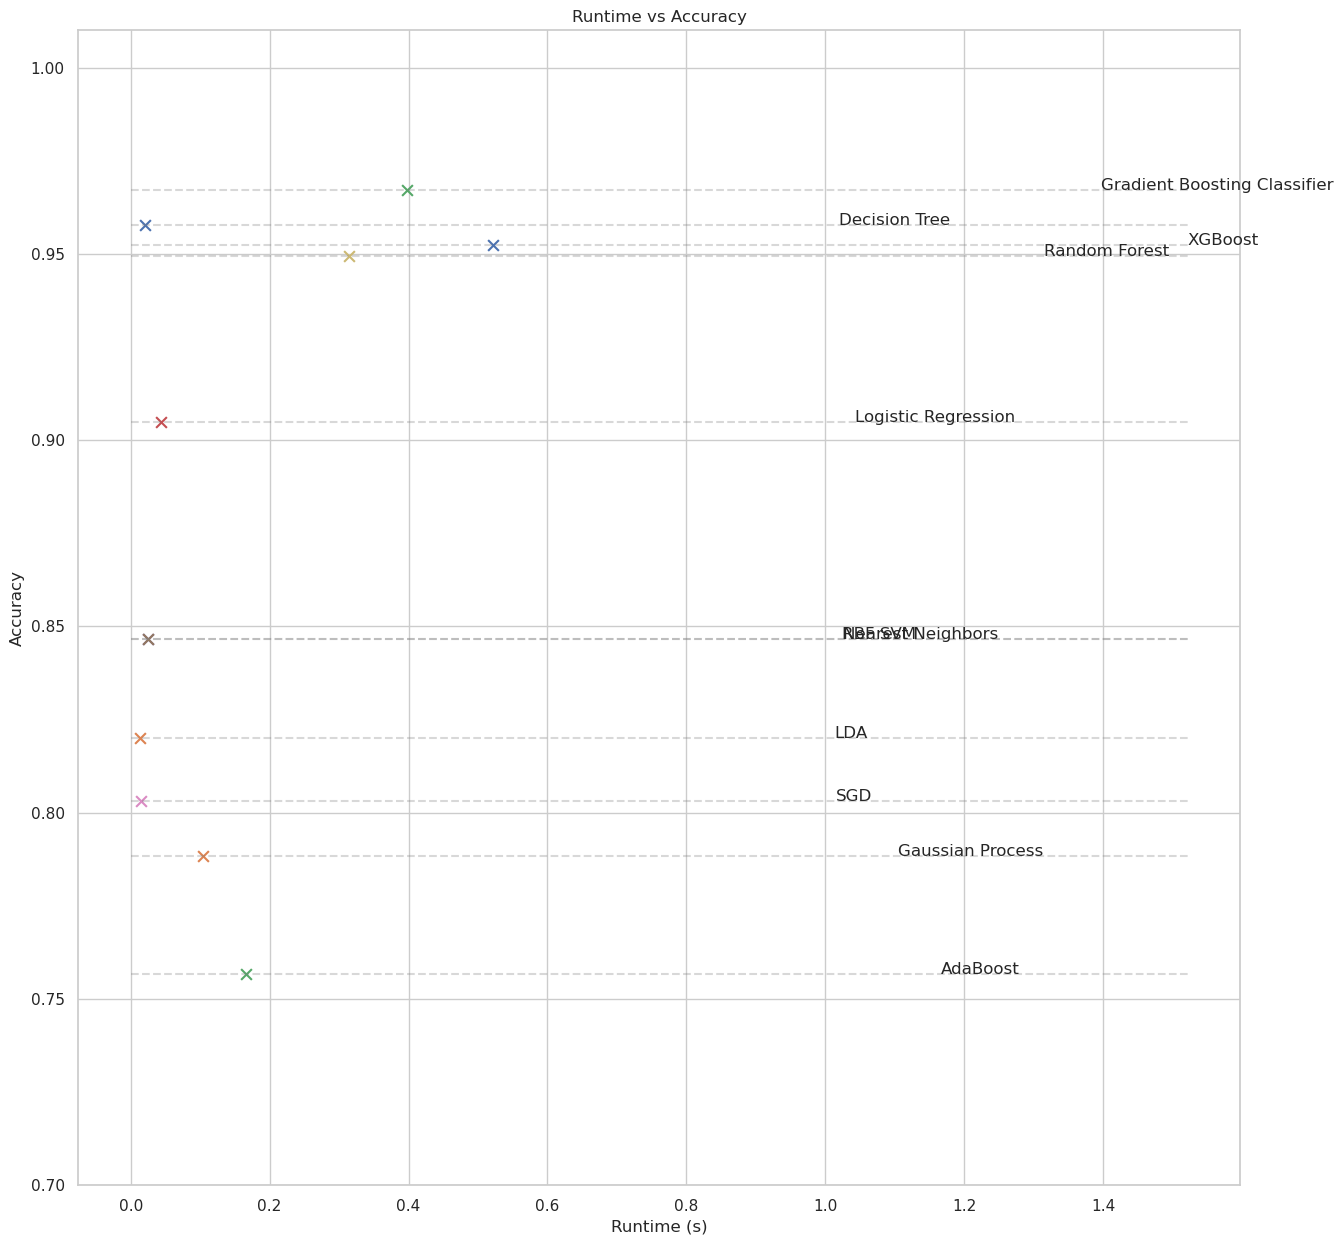

In [39]:
plt.figure(figsize = [15, 15])

for i in range(len(df_merged)):
    # Add classifier values
    plt.scatter(df_merged['runtime'][i], 
            df_merged['accuracy'][i], 
            label = df_merged['Classifier'][i],
               marker = 'x',
               s = 60)
    # Add a dashed lined marking the best accuracy threshold for classifier
    plt.hlines(y = df_merged['accuracy'][i], 
               xmin=0, 
               xmax = np.max(df_merged['runtime'])+1,
              linestyles = 'dashed', alpha = 0.3, color = 'grey')
    # Add classifier name
    plt.annotate(df_merged['Classifier'][i], 
                 (df_merged['runtime'][i]+1, 
                  df_merged['accuracy'][i]),
                )
plt.ylim(bottom = 0.70, top = 1.01)
plt.xlabel('Runtime (s)')
plt.ylabel('Accuracy')
plt.title('Runtime vs Accuracy')
plt.show();

Save top5

In [40]:
top5 = ','.join(df_merged['Classifier'][:5])
text_file = open("top5.txt", "w")
n = text_file.write(top5)
text_file.close()
print(top5.split(','))

['Decision Tree', 'LDA', 'Gradient Boosting Classifier', 'Logistic Regression', 'Nearest Neighbors']
